In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Adverk-Artificial_Intelligence/KNN Using Height and Weight/knn.csv')
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


Data Cleaning and Encoding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [6]:
df["Weight(x2)kg"]=df["Weight(x2)kg"].apply(lambda a:a.replace("kg","")).astype('int')
df["Weight(x2)kg"]

0     51
1     66
2     75
3     69
4     50
5     82
6     65
7     58
8     68
9     63
10    52
11    58
12    78
13    65
14    62
15    72
16    80
17    60
18    57
19    73
20    53
21    74
22    72
23    53
24    55
Name: Weight(x2)kg, dtype: int64

In [7]:
df["Height(y2)cm"]=df["Height(y2)cm"].apply(lambda a:a.replace("cm","")).astype('int')
df["Height(y2)cm"]

0     167
1     177
2     169
3     176
4     173
5     170
6     172
7     180
8     162
9     165
10    174
11    169
12    162
13    168
14    183
15    180
16    180
17    178
18    173
19    164
20    170
21    182
22    175
23    163
24    180
Name: Height(y2)cm, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Weight(x2)kg    0
Height(y2)cm    0
Class           0
dtype: int64

In [11]:
X=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

In [12]:
from sklearn.neighbors import KNeighborsClassifier

For choosing K, K must be,<br>
K>1,<br>
K!=even,<br>
K is near the sq.root of total number of data points, i.e 25

In [13]:
k=5
model=KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [14]:
model.fit(X,y)

KNeighborsClassifier(metric='euclidean')

In [26]:
pred=[[73,170]]
model.predict(pred)

array(['Overweight'], dtype=object)

In [16]:
# Evaluation metrics for classification
# - Accuracy Score
# - Confusion Matrix
# - Classification report
# - Precision Score
# - Recall Score
# - F1 Score
# - AUC ROC curve

In [17]:
# Predicted Values
y_pred=model.predict(X)
y_pred

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [18]:
# Actual Values
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [19]:
23/25

0.92

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.92

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[9, 0, 1],
       [1, 6, 0],
       [0, 0, 8]])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [23]:
pd.DataFrame(confusion_matrix(y,y_pred), index=['Normal_A','Overweight_A','Underweight_A'],
             columns=['Normal_P','Overweight_P','Underweight_{}'])

,Normal_P,Overweight_P,Underweight_{}
Normal_A,9,0,1
Overweight_A,1,6,0
Underweight_A,0,0,8


In [24]:
print("Precision_Noraml : ",9/10)
print("Recall_Noraml : ",9/10)
print("Precision_Overweight : ",6/6)
print("Recall_Overweight : ",6/7)
print("Precision_Underweight : ",8/9)
print("Recall_Underweight : ",8/8)

Precision_Noraml :  0.9
Recall_Noraml :  0.9
Precision_Overweight :  1.0
Recall_Overweight :  0.8571428571428571
Precision_Underweight :  0.8888888888888888
Recall_Underweight :  1.0


In [29]:
df1=df[df["Class"]=="Normal"]
df2=df[df["Class"]=="Overweight"]
df3=df[df["Class"]=="Underweight"]

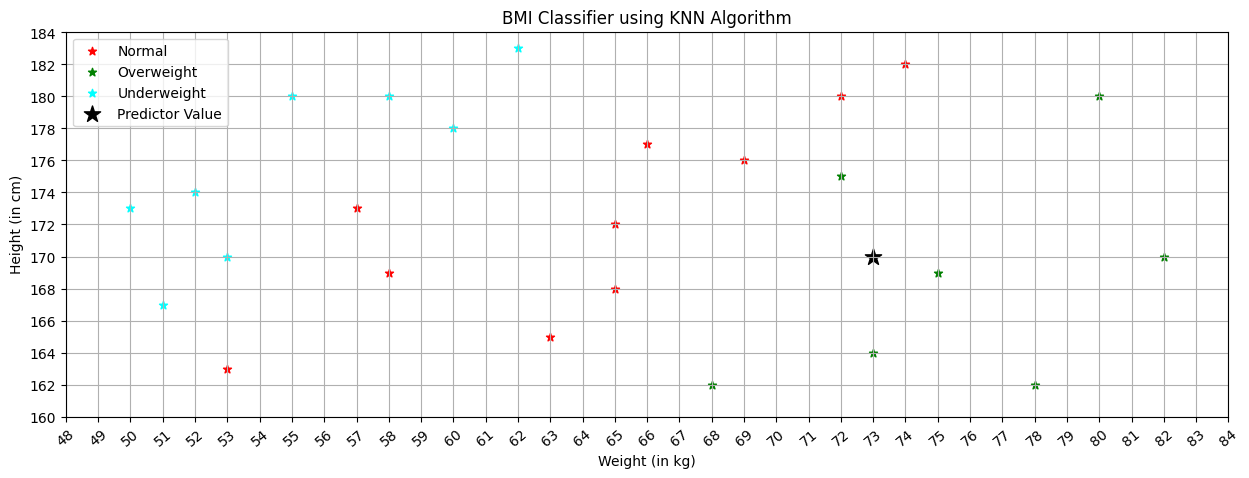

In [30]:
plt.figure(figsize=(15,5))
plt.scatter(df1["Weight(x2)kg"], df1["Height(y2)cm"], label="Normal", marker="*", color="red")
plt.scatter(df2["Weight(x2)kg"], df2["Height(y2)cm"], label="Overweight", marker="*", color="green")
plt.scatter(df3["Weight(x2)kg"], df3["Height(y2)cm"], label="Underweight", marker="*", color="aqua")
plt.scatter(pred[0][0], pred[0][1], label="Predictor Value", marker="*", color="k", s=150)
plt.xticks(np.arange(48,85,1), rotation=40)
plt.yticks(np.arange(160,185,2))
plt.title("BMI Classifier using KNN Algorithm")
plt.xlabel("Weight (in kg)")
plt.ylabel("Height (in cm)")
plt.legend()
plt.grid()
plt.show()

In [31]:
# Deployment

In [32]:
import joblib
joblib.dump(model,"knn_model")

['knn_model']

In [33]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.5 MB/s eta 0:00:00


In [40]:
%%writefile app.py
import streamlit as st
import joblib

model=joblib.load("knn_model")
st.header("BMI classification based on Weight and Height")
st.subheader("This ML model is accomplished by using KNN Classifier Algorithm")

weight=st.number_input("Enter the weight(in kg)", min_value=45, max_value=95, value=65, step=1)
height=st.number_input("Enter the height(in cm), min_value=140", max_value=190, value=175, step=1)

if st.button("PREDICT"):
  op=model.predict([[weight,height]])
  st.subheader("The predicted class for entered weight "+str(weight)+" and the entered height "+str(height)+" is "+str(op[0])+".")

Overwriting app.py


In [39]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ rollbackFailedOptional: verb npm-session 49d6254238b9412


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.133.233:8501

npx: installed 22 in 3.159s
your url is: https://stale-teeth-fold.loca.lt
  Stopping...
^C
